In [1]:
%load_ext autoreload

In [6]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from monetio.models import hysplit

In [7]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
import utilvolc.ash_eval as ae
from utilvolc import volcMER
from utilhysplit.evaluation import ensemble_tools
from utilhysplit.evaluation import plume_stat

In [12]:
bezyloc = [160.587,55.978]
tag ='A'

#----------------------------------------------------------------
# location and name of netcdf file with cdump output.
tdir = '../data/'
tname = 'xrfile.ensCylBezy.nc'

#----------------------------------------------------------------
configdir = '../Run{}'.format(tag)
configfile = 'config.ensCylBezy.txt'

#-----------------------------------------------------------------
# location of volcat files
vdir = '../data/volcat/'.format(tag)
# volcano id to locate
vid = 'v300250'
    

In [14]:
%autoreload
aeval = ae.AshEval(tdir,tname,vdir,vid,configdir=configdir,configfile=configfile)

In [15]:
aeval.cdump

<xarray.DataArray 'p060' (ens: 31, time: 24, z: 9, y: 235, x: 288)>
array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0

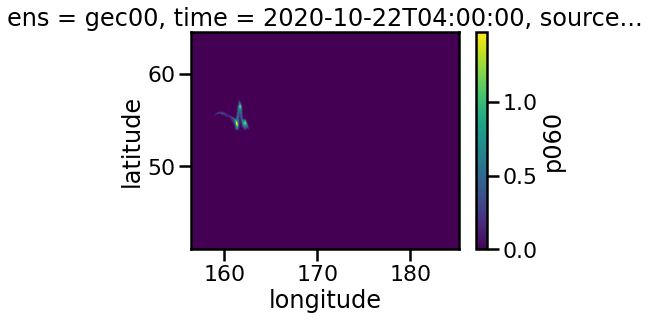

In [9]:
aeval.cdump.isel(ens=0,time=8).sum(dim='z').plot.pcolormesh(x='longitude',y='latitude')

In [16]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,22,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,20):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 22, 17, 0), datetime.datetime(2020, 10, 22, 18, 0)]


In [20]:
%autoreload
# get the current mer from the netcdf file.
xmult = aeval.cdump.mult
print('{:2e}'.format(xmult))
# convert unit mass using the 15000 kg/s from volcat.
from utilvolc import volcMER
cmult = volcMER.MER2unit(1.5e4,1)
print('Using 15000 kg/s: unit mass =  {:2e} g/hr'.format(cmult[0]))
cmult = cmult[0]
%autoreload
# divide by the old conversion factor and multiply by the new one.
aeval.set_concmult(cmult/xmult)

7.153737e+12
Using 15000 kg/s: unit mass =  5.400000e+10 g/hr


In [17]:
# time averages observations
# matches observations and model forecast to the same domain.
# these are stored in dictionaries.
%autoreload
for drange in dlist:
    print(drange)
    aeval.prepare_one_time(drange)

[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]
[datetime.datetime(2020, 10, 22, 7, 0), datetime.datetime(2020, 10, 22, 8, 0)]
[datetime.datetime(2020, 10, 22, 8, 0), datetime.datetime(2020, 10, 22, 9, 0)]
[datetime.datetime(2020, 10, 22, 9, 0), datetime.datetime(2020, 10, 22, 10, 0)]
[datetime.datetime(2020, 10, 22, 10, 0), datetim

In [21]:
# time periods available.
aeval.volcat_avg_hash.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [13]:
#ht = 6.2
ht = 9.0
vent = 2.88
m63 = 0.1
dmult = volcMER.HT2unit(ht-vent,m63)
print('Height of {}km: unit mass = {:2e}'.format(ht,dmult))

HEIGHT 6.1 km,  MER 2.590e+05 kg/s , M63 0.100000 , unit mass=9.326e+10 g/hr.
Height of 9.0km: unit mass = 9.325757e+10


In [19]:
%autoreload
# get the current mer from the netcdf file.
xmult = aeval.cdump.mult
print('{:2e}'.format(xmult))
# convert unit mass using the 15000 kg/s from volcat.
from utilvolc import volcMER
cmult = volcMER.MER2unit(1.5e4,1)
print('Using 15000 kg/s: unit mass =  {:2e} g/hr'.format(cmult[0]))
cmult = cmult[0]
%autoreload
# divide by the old conversion factor and multiply by the new one.
aeval.set_concmult(cmult/xmult)

7.153737e+12
Using 15000 kg/s: unit mass =  5.400000e+10 g/hr


In [22]:
aeval.calc_massload()

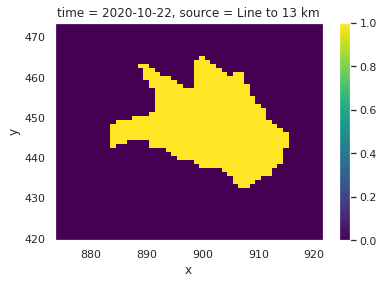

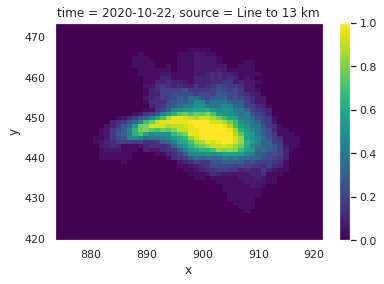

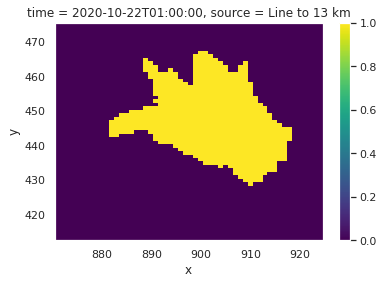

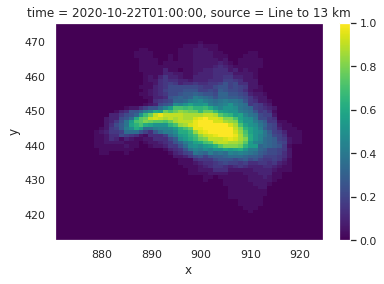

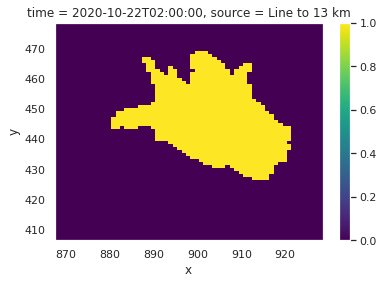

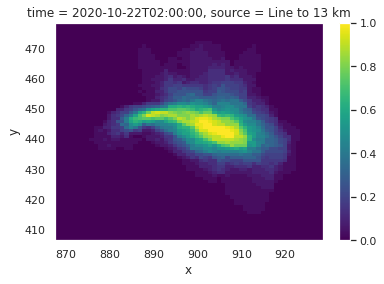

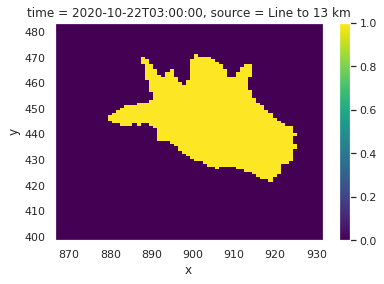

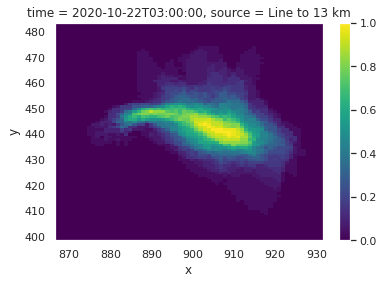

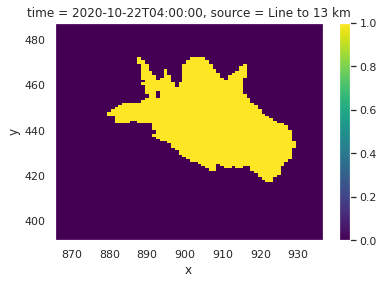

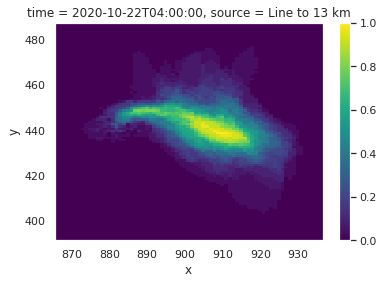

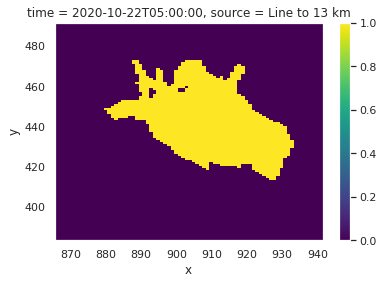

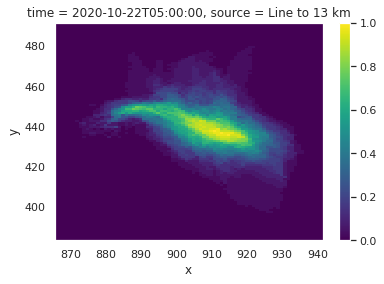

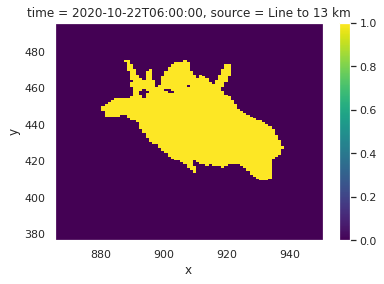

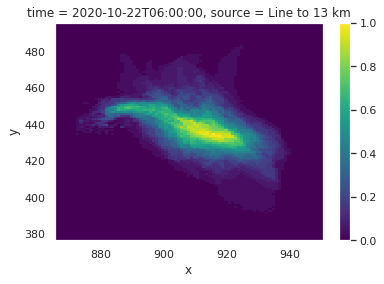

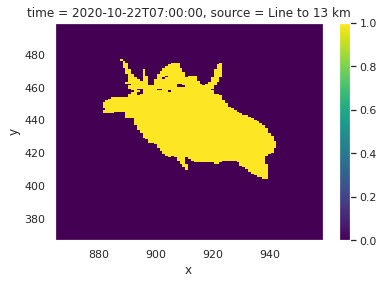

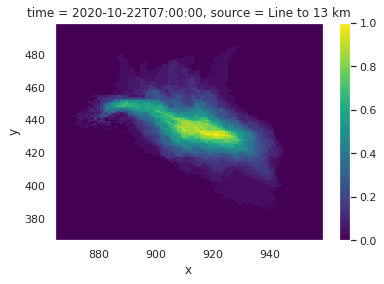

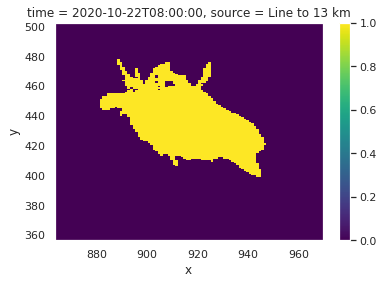

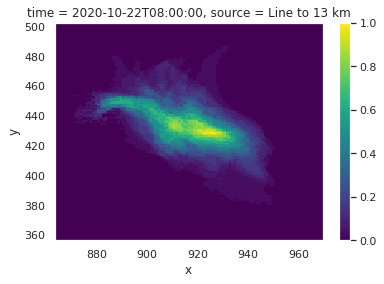

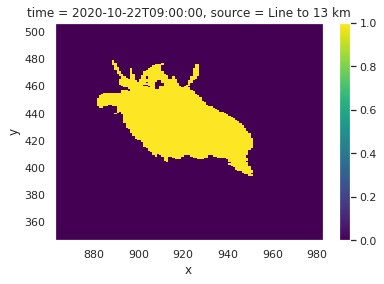

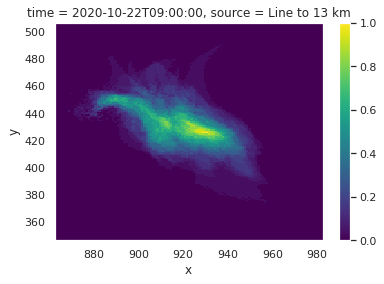

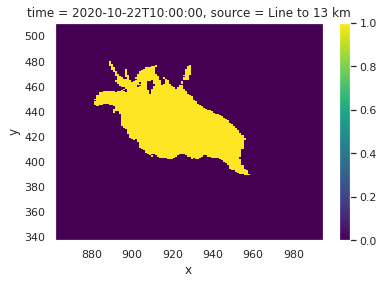

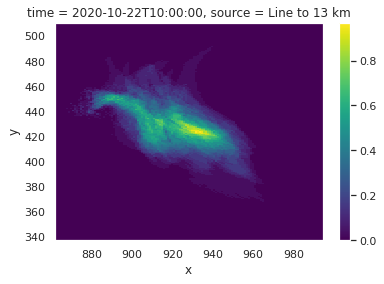

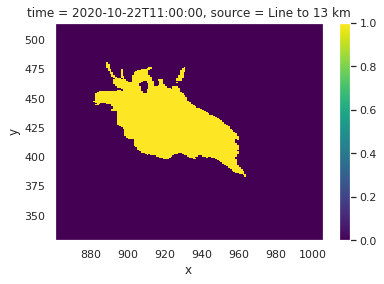

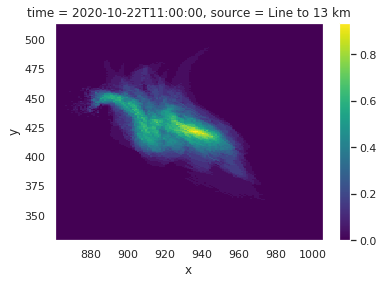

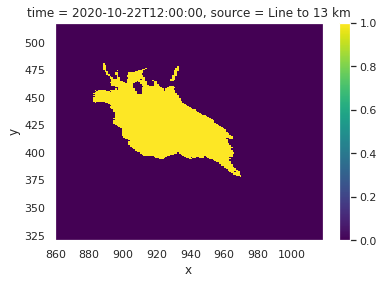

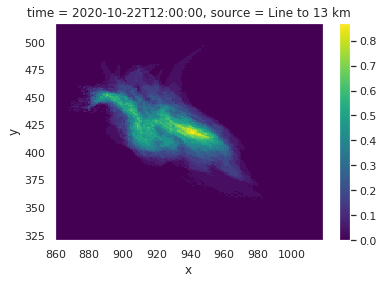

In [39]:
%autoreload
volcat=[]
forecast=[]
for tii in [4,5,6,7,8,9,10,11,12,13,14,15,16]:
    obs, model = aeval.get_pair(tii)
    forecast.append(model)
    volcat.append(obs)

dft = ensemble_tools.ens_time_fss(forecast,volcat,threshold=0.1,neighborhoods=[1,3,5,7,9,11,13,15,17,19,21])

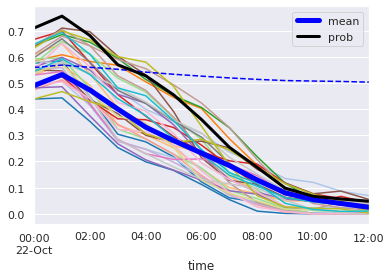

In [26]:
%autoreload
sns.set()
ensemble_tools.plot_ens_fss_ts(dft,nval=3)

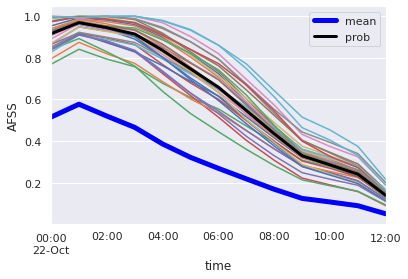

In [27]:
%autoreload
afss = ensemble_tools.plot_afss_ts(dft)


In [37]:
5009*0.0075

37.567499999999995

2020-10-22T04:00:00.000000000
<xarray.DataArray ()>
array(5009.08324099)
Coordinates:
    time     datetime64[ns] 2020-10-22T04:00:00
    source   <U13 'Line to 13 km'
<xarray.DataArray ()>
array(37.81107499)
Coordinates:
    time     datetime64[ns] 2020-10-22T04:00:00
    source   <U13 'Line to 13 km'
0.007548502026204762


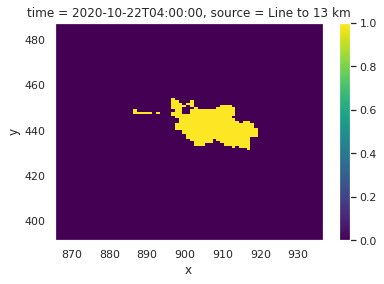

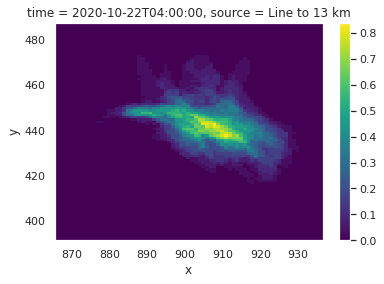

In [36]:
%autoreload
tii=8
print(aeval.cdump.time.values[tii])
volcat,foceast = aeval.get_pair(tii)
print(aeval.concmult)
#forecast = aeval.cdump_hash[tii]
nb = np.arange(1,21,2)
nb = np.append(nb,[31,41,51])
if tii > 8:
    nb = np.append(nb,[61,71,81,91,101])
thresh=0.1
msc, psc, df1 = ensemble_tools.ens_fss(forecast,volcat,threshold=0.01,neighborhoods=nb,return_objects=True,pixel_match=True)

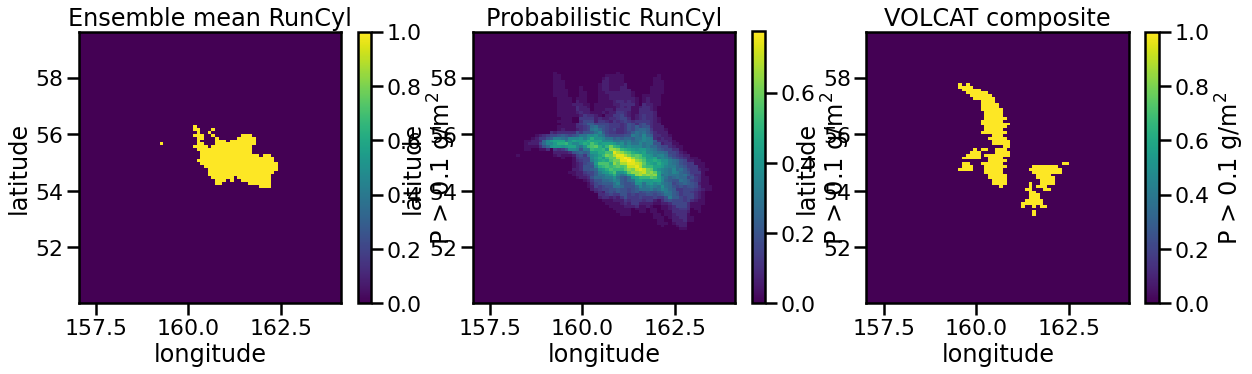

In [24]:
fig = plt.figure(1,figsize=[20,5])
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
chash = {'label': 'P > {} g/m$^2$'.format(thresh)}
msc.binxra2.plot.pcolormesh(ax=ax1,x='longitude',y='latitude', cbar_kwargs=chash)
psc.binxra2.plot.pcolormesh(ax=ax2,x='longitude',y='latitude', cbar_kwargs=chash)
psc.binxra1.plot.pcolormesh(ax=ax3,x='longitude',y='latitude',cbar_kwargs=chash)
ax1.set_title('Ensemble mean RunCyl')
ax2.set_title('Probabilistic RunCyl')
ax3.set_title('VOLCAT composite')
plt.savefig('binary_fields_runCyl_20201022T12')

[0.54137324]


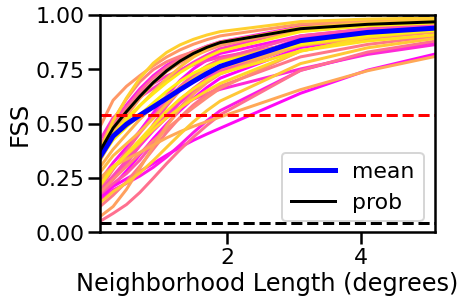

In [25]:
%autoreload
print(df1['uniform'].unique())
ensemble_tools.plot_ens_fss(df1,sizemult=0.1)
ax = plt.gca()
ax.set_ylim([0,1])
ax.set_ylabel('FSS')
ax.set_xlabel('Neighborhood Length (degrees)')
plt.savefig('FSS_runCyl_20201022T12')

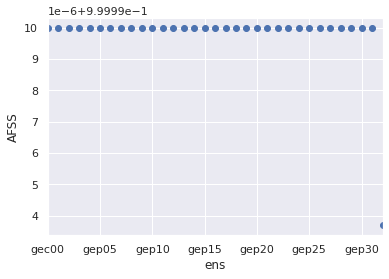

In [26]:
sns.set()
ensemble_tools.plot_afss(df1)

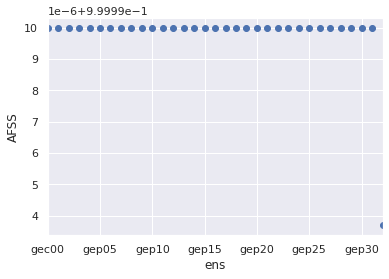

In [28]:
%autoreload
ensemble_tools.plot_afss(df1)

In [68]:
for ens in df1.ens.unique():
    print(ens, df1[df1.ens==ens].afss.unique())

gec00 [0.09800911]
gep01 [0.10947394]
gep02 [0.10408292]
gep03 [0.06367516]
gep04 [0.10714684]
gep05 [0.10743966]
gep06 [0.14602956]
gep07 [0.12443488]
gep08 [0.10874725]
gep09 [0.17351776]
gep10 [0.09105813]
gep11 [0.09959894]
gep12 [0.05342609]
gep13 [0.09084754]
gep14 [0.08799812]
gep15 [0.12849741]
gep16 [0.10272285]
gep17 [0.14316482]
gep18 [0.12003163]
gep19 [0.11745142]
gep20 [0.11235165]
gep21 [0.09884735]
gep22 [0.09260365]
gep23 [0.11545194]
gep24 [0.07744585]
gep25 [0.10691373]
gep26 [0.09548449]
gep27 [0.11808605]
gep28 [0.08115998]
gep29 [0.14592143]
gep30 [0.0827332]
mean [0.02689235]
prob [0.10081547]


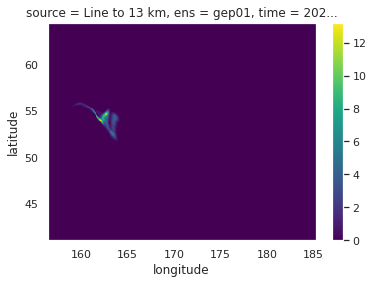

In [38]:
aeval.massload.sel(ens='gep01').isel(time=10).plot.pcolormesh(x='longitude',y='latitude')

In [39]:
aeval.cdump

<xarray.DataArray 'p060' (ens: 31, time: 24, z: 9, y: 235, x: 288)>
array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0

In [40]:
xmult = aeval.cdump.mult
print('{:2e}'.format(xmult))

7.153737e+12


In [41]:
%autoreload
atlconc = ensemble_tools.ATL(aeval.cdump,thresh=0.1)

In [42]:
%autoreload
atlconc2 = ensemble_tools.ATL(aeval.cdump,thresh=0.1)

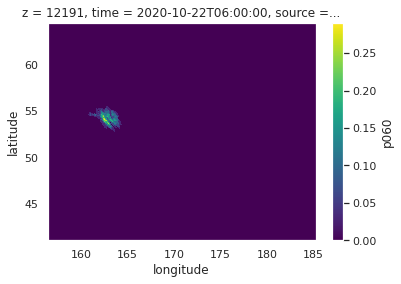

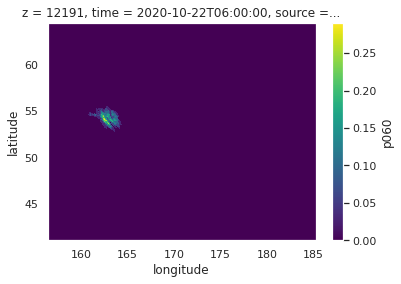

In [43]:
zii=7
atlconc.isel(time=10).isel(z=zii).plot.pcolormesh(x='longitude',y='latitude')
plt.show()
atlconc2.isel(time=10).isel(z=zii).plot.pcolormesh(x='longitude',y='latitude')
plt.show()


In [172]:
%autoreload
apl = ensemble_tools.APLra(aeval.cdump)
apl.coords

Coordinates:
  * x              (x) int64 860 861 862 863 864 ... 1143 1144 1145 1146 1147
  * y              (y) int64 302 303 304 305 306 307 ... 531 532 533 534 535 536
  * z              (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715
  * time           (time) datetime64[ns] 2020-10-21T20:00:00 ... 2020-10-22T19:00:00
    source         <U13 'Line to 13 km'
    latitude       (y, x) float64 41.08 41.08 41.08 41.08 ... 64.48 64.48 64.48
    longitude      (y, x) float64 156.5 156.6 156.7 156.8 ... 185.0 185.1 185.2
    percent_level  (index) float64 3.226 6.452 9.677 12.9 ... 93.55 96.77 100.0

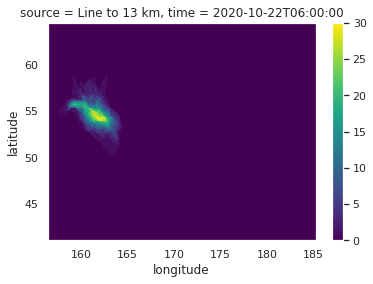

In [171]:
%autoreload
sns.set()
temp = aeval.massload
atl = ensemble_tools.ATL(temp,thresh=0.2)
atl.isel(time=10).plot.pcolormesh(x='longitude',y='latitude')

In [183]:
dim = 'ens'
temp[dim].values

array(['gec00', 'gep01', 'gep02', 'gep03', 'gep04', 'gep05', 'gep06',
       'gep07', 'gep08', 'gep09', 'gep10', 'gep11', 'gep12', 'gep13',
       'gep14', 'gep15', 'gep16', 'gep17', 'gep18', 'gep19', 'gep20',
       'gep21', 'gep22', 'gep23', 'gep24', 'gep25', 'gep26', 'gep27',
       'gep28', 'gep29', 'gep30'], dtype=object)

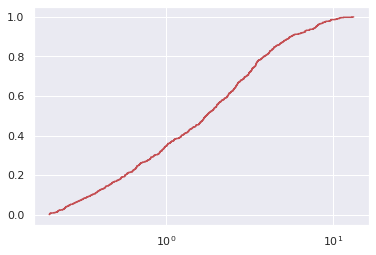

In [193]:
%autoreload
cdfhash = ensemble_tools.ens_cdf(temp.isel(time=10).isel(ens=[1]),threshold=0.2)

tii 8


KeyError: 8

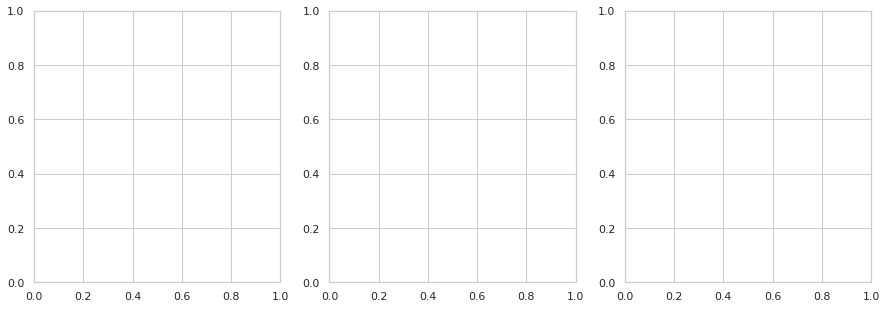

In [202]:
%autoreload
tii = 8
# 10 km diameter and 20 um particles
#fig = aeval.compare_forecast(aeval.massload.sel(ens='gec00').isel(time=tii),vloc=bezyloc)
#plt.show()
# 10 km diameter and 6 um particles
#fig = aeval.compare_forecast(aeval.massload.sel(ens='gep07').isel(time=tii),vloc=bezyloc)
#plt.show()
# 1 km diameter and 6 um particles
fig = aeval.compare_forecast(aeval.massload.sel(ens='gep26').isel(time=tii),vloc=bezyloc)
plt.show()
fig = aeval.compare_forecast(aeval.massload.sel(ens='gep05').isel(time=tii),vloc=bezyloc)
plt.show()
fig = aeval.compare_forecast(aeval.massload.sel(ens='gep10').isel(time=tii),vloc=bezyloc)
plt.show()
fig = aeval.compare_forecast(aeval.massload.sel(ens='gep10').isel(time=tii),vloc=bezyloc)
plt.show()
fig = aeval.compare_forecast(aeval.massload.mean(dim='ens').isel(time=tii),vloc=bezyloc)
plt.show()
fig = aeval.compare_forecast(aeval.massload.max(dim='ens').isel(time=tii),vloc=bezyloc)

In [22]:
%autoreload
aeval.ks_time_series(drange = dlist[0])

<class 'numpy.datetime64'> <class 'datetime.datetime'>
working on 2020-10-21T22:00:00.000000000 cylB
got volcat
start kstestnan
Kolmogorov-Smirnov Parameter 0.20765429554527515 0.20765429554527515
got ks
got area
working on 2020-10-21T22:00:00.000000000 cylA
got volcat
start kstestnan
Kolmogorov-Smirnov Parameter 0.20769777616922214 0.20769777616922214
got ks
got area
working on 2020-10-21T22:00:00.000000000 cylC
got volcat
start kstestnan
Kolmogorov-Smirnov Parameter 0.20766516570126192 0.20766516570126192
got ks
got area
<class 'numpy.datetime64'> <class 'datetime.datetime'>
working on 2020-10-21T23:00:00.000000000 cylB
got volcat
start kstestnan
Kolmogorov-Smirnov Parameter 0.2152160203719512 0.2152160203719512
got ks
got area
working on 2020-10-21T23:00:00.000000000 cylA
got volcat
start kstestnan
Kolmogorov-Smirnov Parameter 0.21519428005997765 0.21519428005997765
got ks
got area
working on 2020-10-21T23:00:00.000000000 cylC
got volcat
start kstestnan
Kolmogorov-Smirnov Parameter 

In [23]:
aeval.kshash

{'cylB': {numpy.datetime64('2020-10-21T22:00:00.000000000'): 0.20765429554527515,
  numpy.datetime64('2020-10-21T23:00:00.000000000'): 0.2152160203719512},
 'cylA': {numpy.datetime64('2020-10-21T22:00:00.000000000'): 0.20769777616922214,
  numpy.datetime64('2020-10-21T23:00:00.000000000'): 0.21519428005997765},
 'cylC': {numpy.datetime64('2020-10-21T22:00:00.000000000'): 0.20766516570126192,
  numpy.datetime64('2020-10-21T23:00:00.000000000'): 0.21520515021596442}}

In [58]:
cylname = os.path.join(cyldir, 'cdump.cylB')
cyl = hysplit.open_dataset(cylname,century=2000)

In [55]:
%autoreload
# convert unit mass using the 1500 kg/s from volcat.
from utilvolc import volcMER
cmult = volcMER.MER2unit(1.5e4,1)
print('Using 15000 kg/s: unit mass =  {:2e} g/hr'.format(cmult[0]))
cmult = cmult[0]

#ht = 6.2
ht = 9.0
vent = 2.88
m63 = 0.1
dmult = volcMER.HT2unit(ht-vent,m63)
print('Height of {}km: unit mass = {:2e}'.format(ht,dmult))

MER = volcMER.mastinMER(10)

Using 15000 kg/s: unit mass =  5.400000e+10 g/hr
HEIGHT 6.1 km,  MER 2.590e+05 kg/s , M63 0.100000 , unit mass=9.326e+10 g/hr.
Height of 9.0km: unit mass = 9.325757e+10


In [51]:
mult = cmult
#cyldump = cyl.p060*mult
print('mass of one particle {:2e} g'.format(pmassmax * mult))
resolution = 0.1 # degrees
lat = 56
# area of one pixel.
area = (resolution*111e3)**2 * np.cos(lat*np.pi/180.0)
vres = 1.5 #km
massload = pmassmax * mult / area
conc = (massload*1000) / (vres*1000)
print('Mass loading of one particle {:2e} g/m2'.format(massload))
print('Concentration of one particle {:2e} mg/m3'.format(conc))
print('Number of particles equal to 0.2 mg/m3 : {}'.format(0.2/conc))
print('Number of particles equal to 2 mg/m3 : {}'.format(2/conc))

mass of one particle 3.368263e+06 g
Mass loading of one particle 4.888757e-02 g/m2
Concentration of one particle 3.259171e-02 mg/m3
Number of particles equal to 0.2 mg/m3 : 6.136529250170647
Number of particles equal to 2 mg/m3 : 61.36529250170647


In [59]:
cyldump = cyl.p200*mult
cylmass = hysplit.hysp_massload(cyldump)

AttributeError: 'Dataset' object has no attribute 'p200'

In [ ]:
# check total mass in simulation.
# this looks correct
for iii in np.arange(1,20):
    temp3 = cylmass.isel(time=iii)
    temp3 = temp3.fillna(0)
    print(pd.to_datetime(temp3.time.values))
    print('total mass {} TG'.format(area * temp3.values.sum() / 1e12) )

In [194]:
%autoreload
for iii in np.arange(1,10):
    temp1 = cylmass.isel(time=iii)
    temp2 = emass.isel(time=iii+2)
    inverse.compare_forecast(temp1,vloc=bezyloc,cmap='PuBu')
    plt.savefig('comparecyl{}.png'.format(iii))
    plt.show()
    #inverse.compare_forecast(temp2,vloc=bezyloc,cmap='PuBu')
    #plt.savefig('compareinv{}.png'.format(iii))
    #plt.show()
    print('------------------------------')

NameError: name 'cylmass' is not defined

Kolmogorov-Smirnov Parameter 0.3524774774774775 0.36209286209286207


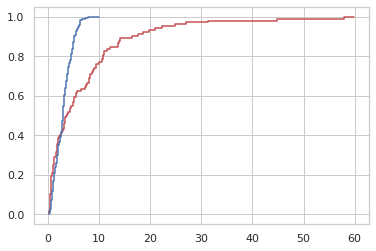

Kolmogorov-Smirnov Parameter 0.33355971896955505 0.3392740046838407


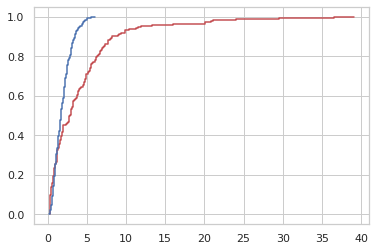

Kolmogorov-Smirnov Parameter 0.32911568409343717 0.3331479421579533


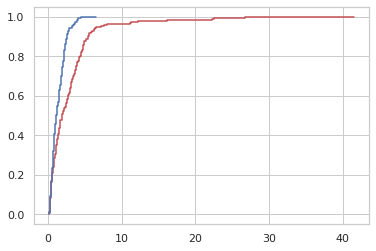

Kolmogorov-Smirnov Parameter 0.2361009827412578 0.23912213077751154


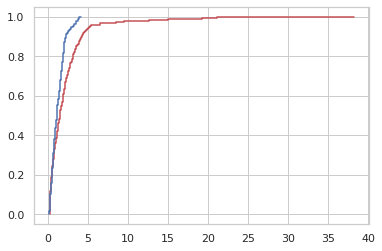

Kolmogorov-Smirnov Parameter 0.2069296375266524 0.20941719971570716


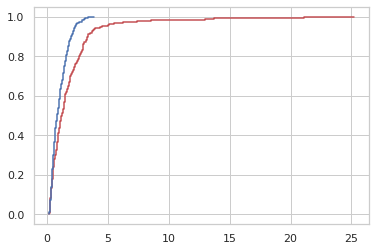

Kolmogorov-Smirnov Parameter 0.23994859110529115 0.2420582957466414


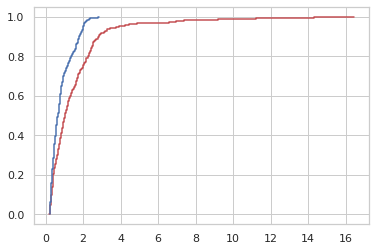

Kolmogorov-Smirnov Parameter 0.24691162496040542 0.24865378523915105


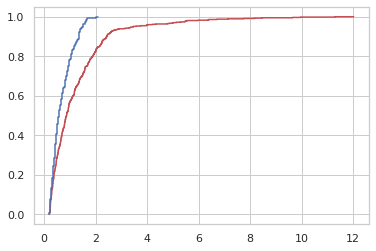

Kolmogorov-Smirnov Parameter 0.22461260931146987 0.2260853633615435


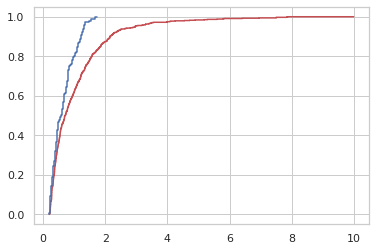

Kolmogorov-Smirnov Parameter 0.19186341203147916 0.19317060157396282


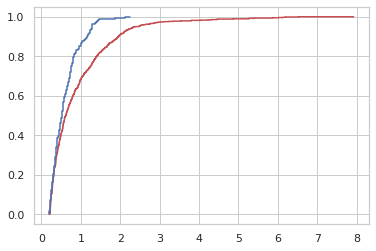

Kolmogorov-Smirnov Parameter 0.15736794567290002 0.15856555046331922


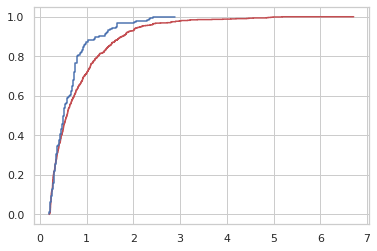

Kolmogorov-Smirnov Parameter 0.07743248242693312 0.07854236034036266


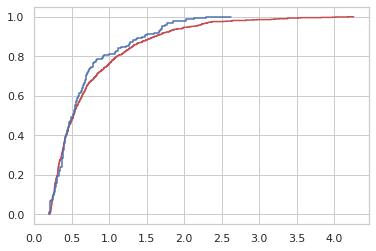

Kolmogorov-Smirnov Parameter 0.2112916477222873 0.21233657980170217


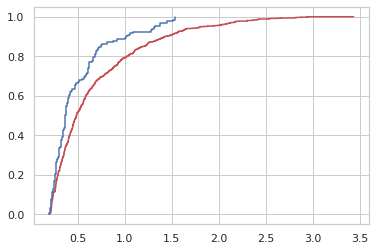

Kolmogorov-Smirnov Parameter 0.2975725446428571 0.2985491071428571


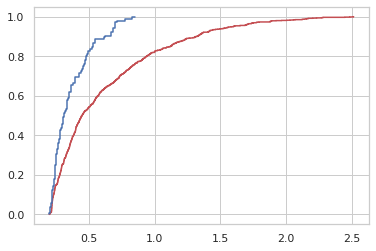

Kolmogorov-Smirnov Parameter 0.337778134789943 0.3387260020885212


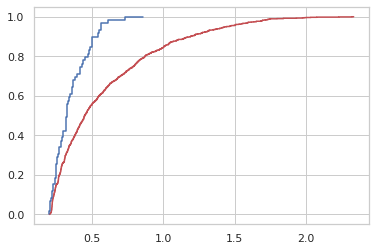

Kolmogorov-Smirnov Parameter 0.1956327812899973 0.16972423690028315


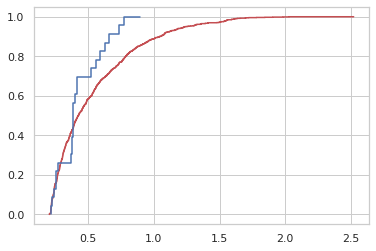

Kolmogorov-Smirnov Parameter 0.33074399487160155 0.3316112975602399


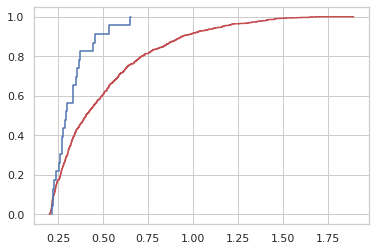

Kolmogorov-Smirnov Parameter 0.46644010195412067 0.4672897196261683


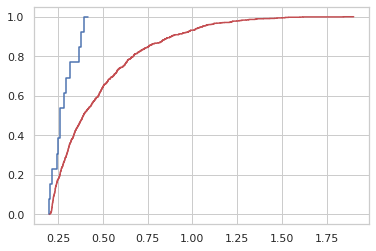

Kolmogorov-Smirnov Parameter 0.3961474036850921 0.3969849246231155


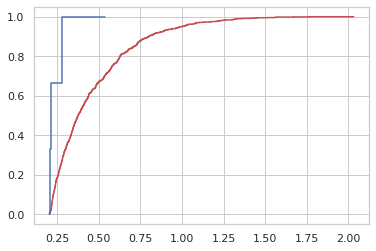

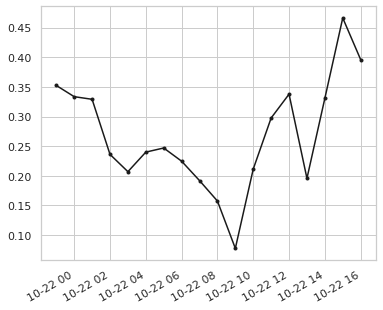

Text(0, 0.5, 'Number of pixels')

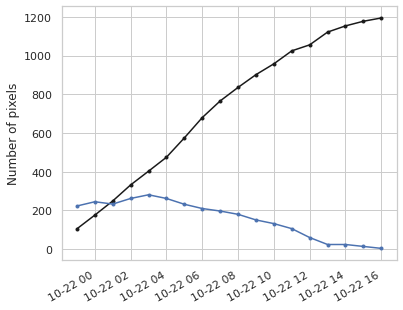

In [146]:
%autoreload
thresh = 0.2
kslist = []
datelist = []
volcat_area = []
forecast_area = []
for iii in np.arange(1,19):
    temp = cylmass.isel(time=iii)
    ks = inverse.compare_forecast_dist(temp,thresh=thresh)
    kslist.append(ks)
    datelist.append(cylmass.time.values[iii])
    a1, a2 = inverse.compare(temp,thresh=thresh)
    volcat_area.append(a2)
    forecast_area.append(a1)
    plt.savefig('cylcdf{}.png'.format(iii))
    plt.show()
fig = plt.figure(10)
plt.plot(datelist,kslist, '-k.')
fig.autofmt_xdate(0)
plt.show()
fig2 = plt.figure(11)
ax = fig2.add_subplot(1,1,1)
plt.plot(datelist,forecast_area,'-k.')
plt.plot(datelist,volcat_area, '-b.')
#plt.plot(inv_datelist,inv_area,'-r.')
fig2.autofmt_xdate(0)
ax.set_ylabel('Number of pixels')

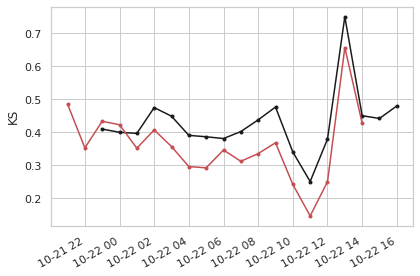

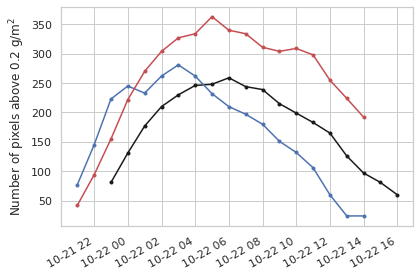

In [318]:
fig = plt.figure(10)
plt.plot(datelist,kslist, '-k.')
plt.plot(inv_datelist,inv_kslist,'-r.')
fig.autofmt_xdate(0)
ax = plt.gca()
ax.set_ylabel('KS')
plt.tight_layout()
plt.savefig('KStest.png')
plt.show()
fig2 = plt.figure(11)
ax = fig2.add_subplot(1,1,1)
plt.plot(datelist,forecast_area,'-k.',label='Traditional')
plt.plot(inv_datelist,inv_volcat_area, '-b.',label='VOLCAT')
plt.plot(inv_datelist,inv_area,'-r.',label='Inversion Scheme')
fig2.autofmt_xdate(0)
ax.set_ylabel('Number of pixels above 0.2 g/m$^2$')
plt.tight_layout()
plt.savefig('Area_comparison.png')

In [195]:
181.4853-360.0

-178.5147

In [210]:
temp3 = inverse.cdump

In [212]:
temp3

<xarray.DataArray 'p060' (ens: 132, time: 47, z: 10, y: 214, x: 355)>
[4713178800 values with dtype=float32]
Coordinates:
  * ens        (ens) object '102119_2880' '102119_3880' ... '102206_12880'
  * time       (time) datetime64[ns] 2020-10-21T20:00:00 ... 2020-10-23T18:00:00
  * y          (y) int64 288 290 291 292 293 294 295 ... 497 498 499 500 501 502
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715 15239
  * x          (x) int64 827 829 833 834 835 838 ... 1188 1190 1198 1199 1205
    source     <U13 'Line to 14 km'
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes:
    Species ID:               p060
    sample time hours:        0.0
    time description:         start of sampling time period
    mult:                     1
    HYSPLIT_DIR:              /hysplit-users/alicec/FBamcArea/
    MAP_DIR:                  /hysplit-users/alicec/hysplit.v5.0.0/graphics/
    WORK_DIR:                 /hysplit-users/alicec/tmp/
    CONVERT_EXE:              convert
    PYTHON_EXE:               /hysplit-users/alicec/anaconda3/envs/hysplit/bi...
    forecastDirectory:        /pub/forecast
    archivesDirectory:        /pub/archives
    GHOSTSCRIPT_EXE:          gs
    DATA_DIR:                 /hysplit-users/alicec/utilhysplit/utilvolc/ashapp/
    owner:                    A. Person
    VolcanoName:              Bezymianny
    area:                     785000.0
    top:                      13880.0
    bottom:                   12880.0
    start_date:               2020-10-22 06:00:00
    durationOfSimulation:     36.0
    testminutes:              0.0
    emissionHours:            1
    meteorologicalData:       GFS0p25
    EruptionSize:             0.0
    latitude:                 55.978
    longitude:                160.587
    samplingIntervalHours:    1.0
    eflag:                    0.0
    source_type:              uniform
    jobname:                  ashtest
    runflag:                  inverse
    gisOption:                3
    zoomFactor:               50
    generatingPostscript:     True
    generatingPDF:            True
    mapBackground:            arlmap
    mapProjection:            0
    spatialPlotRadius:        500.0
    graphicsResolution:       200
    zip_compression_level:    3
    rate:                     1
    timeres:                  1
    inv_vertical_resolution:  1000

In [94]:
%autoreload
temp = emass.isel(time=5)
scores = inverse.calc_fss(temp) 

NameError: name 'emass' is not defined

In [214]:
# values in grid are 0.05 off.
print(temp.shape)
volc = inverse.match_volcat(temp)
print(volc.shape)
#print(temp)
#print(volc)
xv = volc.x.values
iii = xv[10]
x1 = temp.sel(x=iii).longitude.values[0]
x2 = volc.sel(x=iii).longitude.values[0]
print('index {} values {} {} diff {}'.format(iii,x1,x2,x2-x1))
x1 = temp.sel(x=iii).longitude.values[0]
x2 = temp.sel(x=iii+1).longitude.values[0]
print('lon spacing is {}'.format(x2-x1))

yv = volc.y.values
iii = yv[10]
y1 = temp.sel(y=iii).latitude.values[0]
y2 = volc.sel(y=iii).latitude.values[0]
print('index {} values model {} volcat {} diff {}'.format(iii,y1,y2,y2-y1))
y1 = temp.sel(y=iii).latitude.values[0]
y2 = temp.sel(y=iii+1).latitude.values[0]
print('lat spacing is {}'.format(y2-y1))

temp3 = inverse.cdump
y1 = temp3.sel(y=iii).latitude.values[0]
print('cdump {}'.format(y1))

(206, 459)
(47, 48)
index 883 values 158.78565979003906 158.83700693026185 diff 0.05134714022278786
lon spacing is 0.09999847412109375
index 434 values model 54.27816581726074 volcat 54.32800128683448 diff 0.04983546957373619
lat spacing is 0.10000038146972656
cdump 54.32800128683448


In [202]:
scores.calc_csi()

CSI:  0.4876543209876543 POD:  0.6991150442477876 FAR:  0.3828125


{'hits': <xarray.DataArray (y: 47, x: 48)>
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])
 Coordinates:
   * y        (y) int64 424 425 426 427 428 429 430 ... 465 466 467 468 469 470
   * x        (x) int64 873 874 875 876 877 878 879 ... 915 916 917 918 919 920
     time     datetime64[ns] 2020-10-22T01:00:00,
 'misses': <xarray.DataArray (y: 47, x: 48)>
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])
 Coordinates:
     longitude  (y, x) float64 157.8 157.9 158.0 158.1 ... 162.3 162.4 162.5
     latitude   (y, x) float64 53.33 53.33 53.33 53.33 ... 57.93 57.93 57.93
   * y          (y) int6

In [171]:
scores.calc_fss(makeplots=True)

ValueError: operands could not be broadcast together with shapes (179,285) (193,393) 

In [14]:
diameter = 100e3
area = np.pi * (diameter/2)**2
'{:4e}'.format(area)

'7.853982e+09'

In [29]:
%autoreload
tii = 8
volcat = aeval.volcat_avg_hash[tii]
forecast = aeval.cdump_hash[tii]
probscores = plume_stat.CalcScores(volcat, forecast,threshold=0.1,probabilistic=True)


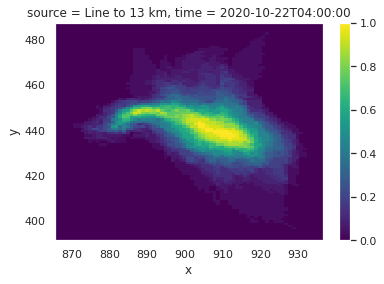

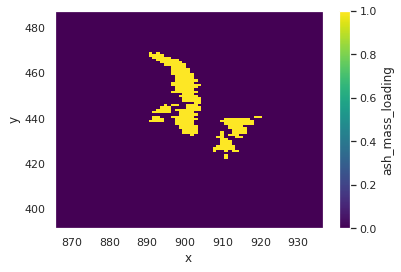

In [30]:
probscores.binxra2.plot.pcolormesh()
plt.show()
probscores.binxra1.plot.pcolormesh()

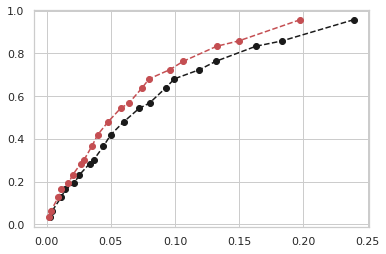

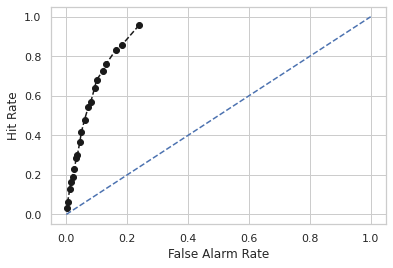

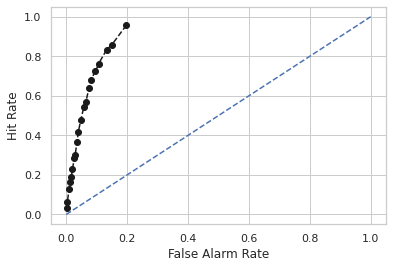

In [33]:
%autoreload
sns.set()
sns.set_style('whitegrid')
pm=True
datedf1 = pd.to_datetime(aeval.cdump.time.values[tii])
timetag = datedf1.strftime("%Y%m%dT%H")
if pm: timetag + '_pm'

xlist, ylist = probscores.calc_roc(clip=True)
xlist2,ylist2 = probscores.calc_roc(clip=False)
plt.plot(xlist,ylist,'--ko')
plt.plot(xlist2,ylist2,'--ro')
plt.show()
plume_stat.plot_roc(xlist,ylist)
plt.savefig('ROC_runCyl_{}'.format(timetag))
plume_stat.plot_roc(xlist2,ylist2)

In [27]:
%autoreload
tii=5
threshold=0.1
volcat=[]
forecast=[]
# look at these time periods.
for tii in [4,5,6,7,8,9,10,11,12,13,14,15,16]:
    volcat.append(aeval.volcat_avg_hash[tii])
    forecast.append(aeval.cdump_hash[tii])

dft = ensemble_tools.ens_time_fss(forecast,volcat,threshold=threshold,neighborhoods=[1,3,5,7,9,11,13,15,17,19,21],plot=False)

# Reliability Curves

In [28]:
from utilhysplit.evaluation import reliability


In [29]:
thresh=0.1
num=31
rc = reliability.ReliabilityCurve(thresh,num)

In [31]:
volcat[0]

<xarray.DataArray 'ash_mass_loading' (y: 54, x: 48)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * y          (y) int64 420 421 422 423 424 425 426 ... 468 469 470 471 472 473
  * x          (x) int64 874 875 876 877 878 879 880 ... 916 917 918 919 920 921
    longitude  (y, x) float64 157.9 158.0 158.1 158.2 ... 162.4 162.5 162.6
    latitude   (y, x) float64 52.88 52.88 52.88 52.88 ... 58.18 58.18 58.18

In [39]:
obs = volcat[0]

In [36]:
prob = ensemble_tools.ATL(forecast[0],thresh=0.1,norm=True)

In [40]:
print(obs.size)
print(prob.size)

2592
2592
